<a href="https://colab.research.google.com/github/benmanjackson/CS290/blob/main/GaussianMixtureModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12/09/24 Homework

## Task



* implement the gaussian mixture model and apply it to both the iris dataset and the penguins dataset
* Iris can be found through sklearn.datasets
* Compare the means from GMM to the centroids from k-means and plot
* Compare the overall accuracy of the two methods and compare



[Palmer penguins dataset](https://allisonhorst.github.io/palmerpenguins/).



## Load and inspect the data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [ ]:
#Penguins dataframe
df_penguins = pd.read_csv("https://github.com/benmanjackson/CS290/raw/refs/heads/main/penguins.csv")

In [ ]:
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
print(df_penguins.columns)

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


In [ ]:
#Preprocess our penguins:
df_penguins.dropna(inplace=True)
X_penguins = df_penguins[["bill_length_mm", "bill_depth_mm"]].values #Two features used
X_penguins = StandardScaler().fit_transform(X_penguins)
y_penguins = df_penguins["species"].values
label_encoder = LabelEncoder()
y_penguins = label_encoder.fit_transform(y_penguins)

In [ ]:
#Iris dataframe:
data_iris = load_iris()
X_iris = data_iris.data[:, :2] #Two features used
y_iris = data_iris.target
X_iris = StandardScaler().fit_transform(X_iris)

In [ ]:
#Plotting our Gaussian Mixture Model:
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution)
    )
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(
        xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12)
    )
    plt.contour(
        xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors="k"
    )

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors="r", linestyles="dashed")

    plt.plot(X[:, 0], X[:, 1], "k.", markersize=2)
    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

##EVALUATION

In [ ]:
#Penguins Gaussian Mixture Model:
gmm_penguins = GaussianMixture(n_components=3, n_init=10, random_state=42)
gmm_penguins.fit(X_penguins)

GaussianMixture(n_components=3, n_init=10, random_state=42)

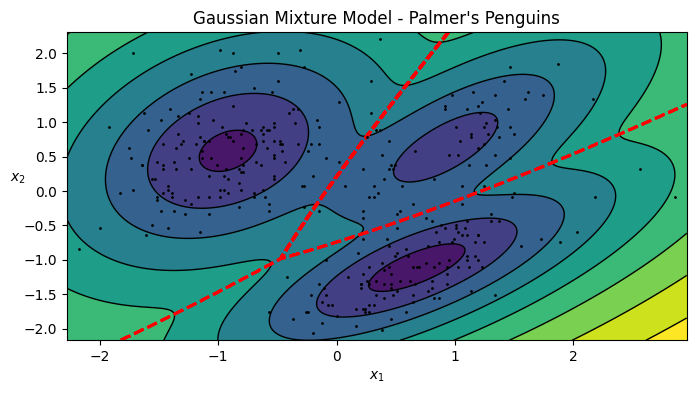

In [ ]:
#Penguin Plotting:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gmm_penguins, X_penguins)
plt.title("Gaussian Mixture Model - Palmer's Penguins")
plt.show()

In [ ]:
#Model Properties for Penguins
print("Penguins Dataset:")
print("Weights:", gmm_penguins.weights_)
print("Means:\n", gmm_penguins.means_)
print("Covariances:\n", gmm_penguins.covariances_)
print("Converged:", gmm_penguins.converged_)
print("Iterations:", gmm_penguins.n_iter_)

Penguins Dataset:
Weights: [0.45550429 0.35059611 0.1938996 ]
Means:
 [[-0.91637011  0.5839904 ]
 [ 0.67791409 -1.11226016]
 [ 0.92695639  0.63921717]]
Covariances:
 [[[0.25427592 0.10204983]
  [0.10204983 0.38345409]]

 [[0.34786563 0.21539556]
  [0.21539556 0.24965469]]

 [[0.26809709 0.21971086]
  [0.21971086 0.35844942]]]
Converged: True
Iterations: 13


In [ ]:
#Iris Gaussian Mixture Model:
gmm_iris = GaussianMixture(n_components=3, n_init=10, random_state=42)
gmm_iris.fit(X_iris)

GaussianMixture(n_components=3, n_init=10, random_state=42)

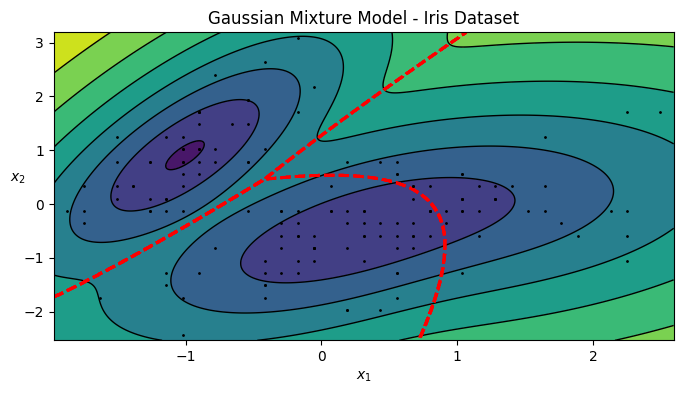

In [ ]:
#Iris Plotting:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gmm_iris, X_iris)
plt.title("Gaussian Mixture Model - Iris Dataset")
plt.show()

In [ ]:
#Model Properties of Iris:
print("\nIris Dataset:")
print("Weights:", gmm_iris.weights_)
print("Means:\n", gmm_iris.means_)
print("Covariances:\n", gmm_iris.covariances_)
print("Converged:", gmm_iris.converged_)
print("Iterations:", gmm_iris.n_iter_)


Iris Dataset:
Weights: [0.40579535 0.26978349 0.32442115]
Means:
 [[ 0.10177427 -0.70309015]
 [ 1.0538755  -0.03321509]
 [-1.00368837  0.90706662]]
Covariances:
 [[[0.41600689 0.25262532]
  [0.25262532 0.4987097 ]]

 [[0.53247079 0.12529994]
  [0.12529994 0.46446326]]

 [[0.17532009 0.24643925]
  [0.24643925 0.63035859]]]
Converged: True
Iterations: 8


## Let's run our k-means algorithm to get our centroids so that we can later compare them to the means from Gaussian Mixture

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
df_kmeans_penguins = pd.read_csv("https://github.com/benmanjackson/CS290/raw/refs/heads/main/penguins.csv")

In [ ]:
priors = df_kmeans_penguins["species"].value_counts( normalize=True )
priors

,proportion
species,
Adelie,0.441860
Gentoo,0.360465
Chinstrap,0.197674


In [ ]:
#Drops rows with missing values
df_kmeans_penguins.dropna(inplace=True)
#We need to encode our categorical target variable (species) into 0,1,2 respectively for the 3 species so that k-means works properly
label_encoder = LabelEncoder()
df_kmeans_penguins['species'] = label_encoder.fit_transform(df_kmeans_penguins['species'])

In [ ]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df_kmeans_penguins[features].values
y = df_kmeans_penguins['species'].values #Gives the true labels for evaluation
df_kmeans_penguins = df_kmeans_penguins.drop(columns=['species'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#K-means functions:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

def calculate_inertia(X, centroids, clusters):
    distances = np.array([np.array([euclidean_distance(x, centroid) for x in X]) for centroid in centroids])
    return np.sum(np.min(distances, axis=0))

def calculate_accuracy(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    return np.sum(np.amax(cm, axis=0)) / np.sum(cm)

def initialize_centroids(X, k, method="random"):
    if method == "random":
      #This will randomly select k datapoints for our initial centroids
        indices = np.random.choice(X.shape[0], size=k, replace=False)
        return X[indices]
    elif method == "kmeans++":
      #K-means++ initialization as described by Arthur and Vassilvitskii
        centroids = [X[np.random.randint(X.shape[0])]] #begins with a random centroid
        for _ in range(1, k):
          #Computes euclidean distance of each point with closest centroid
            distances = np.array([np.min([euclidean_distance(x, centroid) for centroid in centroids]) for x in X])
            #This is the probability proportional to the distance squared
            probs = distances**2 / np.sum(distances**2)
            new_centroid = X[np.random.choice(range(X.shape[0]), p=probs)]
            centroids.append(new_centroid)
        return np.array(centroids)
    else:
        raise ValueError("Invalid method specified for centroid initialization. Maybe try 'random' or 'k-means++'.")

def assign_clusters(X, centroids):
  #computes distances from each point to each centroid
    distances = np.array([[euclidean_distance(x, centroid) for centroid in centroids] for x in X])
    #Returns index of closest centroid for each point
    return np.argmin(distances, axis=1)

def update_centroids(X, clusters, k):
    new_centroids = np.zeros((k, X.shape[1]))  # Initialize centroids with zeros
    for j in range(k):
        #Select the points that belong to cluster j
        cluster_points = X[clusters == j]

        #DEBUGGING: Check the shape of cluster_points and clusters
        print(f"Cluster {j}: Number of points = {len(cluster_points)}")
        print(f"Shape of cluster_points: {cluster_points.shape}")
        print(f"Shape of clusters array: {clusters.shape}")

        #If a cluster has no points assigned, lets pick a random point as the centroid
        if cluster_points.shape[0] > 0:
            new_centroids[j] = cluster_points.mean(axis=0)  #Mean across rows
        else:
            #If no points are assigned, just pick the old centroid
            new_centroids[j] = X[np.random.choice(X.shape[0])]

    return new_centroids

def plot_clusters(X, clusters, centroids, iteration):
  plt.figure(figsize=(10, 6))
  for i in range(len(centroids)):
    #Plot the points in each cluster
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f"Cluster {i+1}")
  #Now plot the centroids
  plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label="Centroids")
  plt.title(f"Iteration {iteration}")
  plt.legend()
  plt.show()

def plot_elbow_graph(inertia_values):
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, inertia_values, 'o-', color='blue', label="Inertia")
    plt.xlabel('Number of cluster (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Graph ')
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()

In [ ]:
#K-means algorithm:
def k_means(X, k, max_iterations=100, tolerance=1e-4, init_method="random", true_labels=None):
  #Initialize the centroids first
    centroids = initialize_centroids(X, k, method=init_method)
    inertia_values = [] #Array for storing inertia for elbow graph
    for i in range(max_iterations):
      #Assign clusters to nearest centroid
      clusters = assign_clusters(X, centroids)
      #Next, update centroids as the mean of the assigned points
      new_centroids = update_centroids(X, clusters, k)
      #Calculate/ the inertia as well
      inertia = calculate_inertia(X, centroids, clusters)
      inertia_values.append(inertia)
      #Calculate silhouette
      #silhouette = silhouette_score(X, clusters) if len(set(clusters)) > 1 else float('nan')
      #Then the accuracy for true labels
      accuracy = calculate_accuracy(true_labels, clusters)
      #Print metrics per iterations
      print(f"Iteration {i}:")
      print(f"  Inertia: {inertia:.4f}")
      #print(f"  Silhouette Coefficient: {silhouette:.4f}")
      if true_labels is not None:
          print(f"  Accuracy: {accuracy:.4f}")
      #Then, lets plot the progress
      plot_clusters(X, clusters, centroids, iteration=i)
      #Finally, check for convergence, where the centroids don't move very significantly
      diff = np.linalg.norm(centroids - new_centroids)
      print(f"Iteration {i}: Centroid shift = {diff:.4f}")
      if diff < tolerance:
        print(f"Convergence reached.")
        break
      centroids = new_centroids

    #plot_elbow_graph(inertia_values) #Plots inertia

    return centroids, clusters, inertia_values

Cluster 0: Number of points = 106
Shape of cluster_points: (106, 2)
Shape of clusters array: (333,)
Cluster 1: Number of points = 175
Shape of cluster_points: (175, 2)
Shape of clusters array: (333,)
Cluster 2: Number of points = 52
Shape of cluster_points: (52, 2)
Shape of clusters array: (333,)
Iteration 0:
  Inertia: 284.6947
  Accuracy: 0.7868


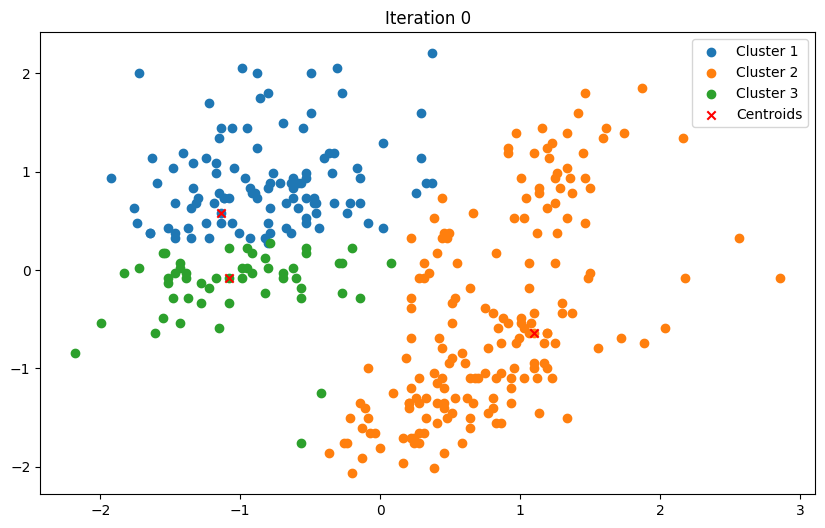

Iteration 0: Centroid shift = 0.5708
Cluster 0: Number of points = 95
Shape of cluster_points: (95, 2)
Shape of clusters array: (333,)
Cluster 1: Number of points = 174
Shape of cluster_points: (174, 2)
Shape of clusters array: (333,)
Cluster 2: Number of points = 64
Shape of cluster_points: (64, 2)
Shape of clusters array: (333,)
Iteration 1:
  Inertia: 266.6243
  Accuracy: 0.7898


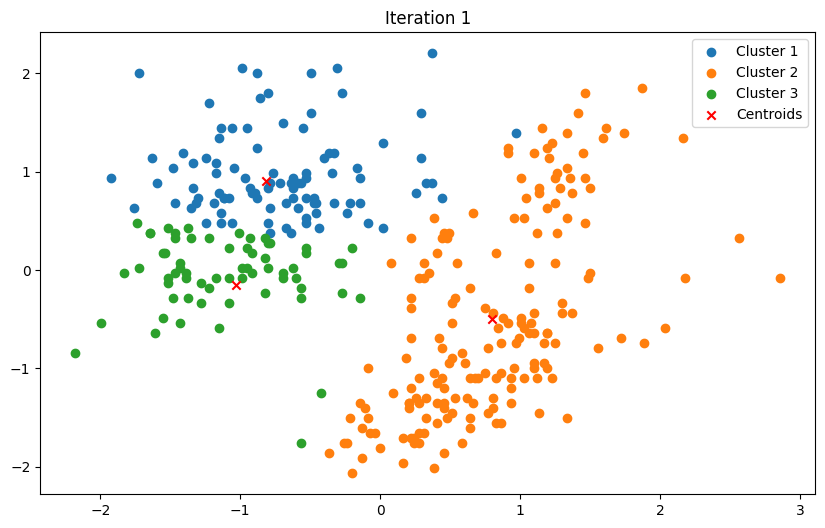

Iteration 1: Centroid shift = 0.1782
Cluster 0: Number of points = 94
Shape of cluster_points: (94, 2)
Shape of clusters array: (333,)
Cluster 1: Number of points = 171
Shape of cluster_points: (171, 2)
Shape of clusters array: (333,)
Cluster 2: Number of points = 68
Shape of cluster_points: (68, 2)
Shape of clusters array: (333,)
Iteration 2:
  Inertia: 264.0964
  Accuracy: 0.7898


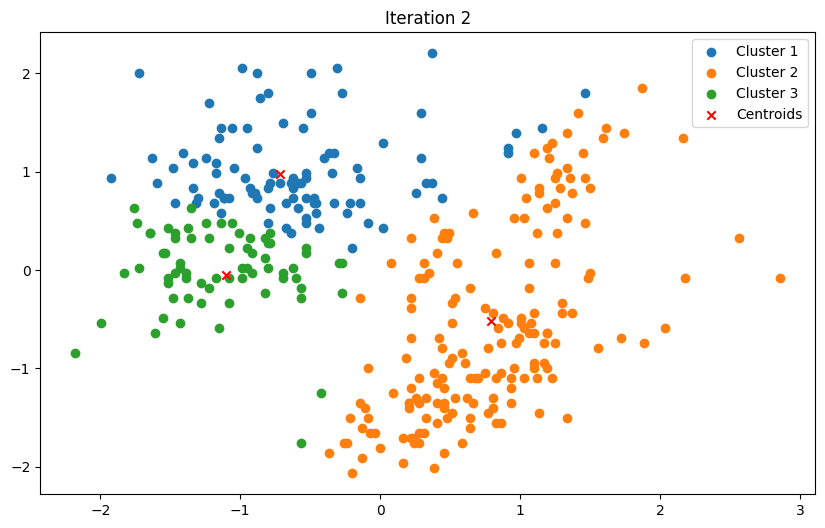

Iteration 2: Centroid shift = 0.1448
Cluster 0: Number of points = 94
Shape of cluster_points: (94, 2)
Shape of clusters array: (333,)
Cluster 1: Number of points = 166
Shape of cluster_points: (166, 2)
Shape of clusters array: (333,)
Cluster 2: Number of points = 73
Shape of cluster_points: (73, 2)
Shape of clusters array: (333,)
Iteration 3:
  Inertia: 262.2732
  Accuracy: 0.7958


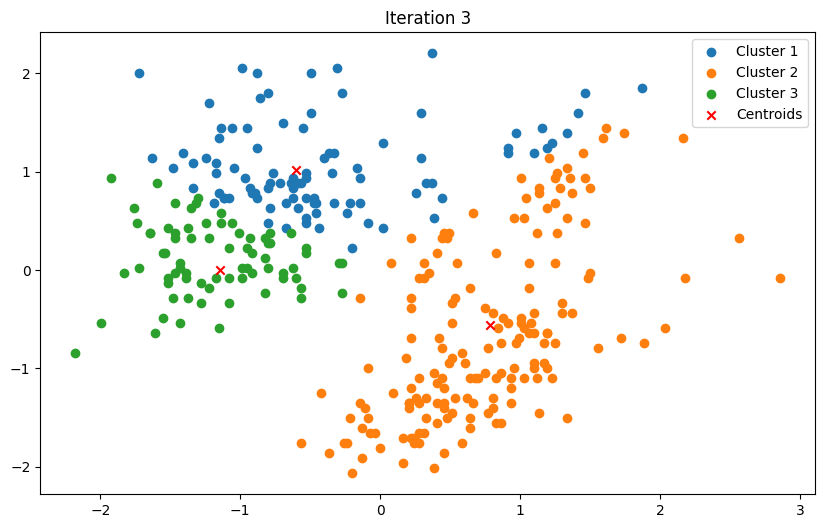

Iteration 3: Centroid shift = 0.2458
Cluster 0: Number of points = 94
Shape of cluster_points: (94, 2)
Shape of clusters array: (333,)
Cluster 1: Number of points = 156
Shape of cluster_points: (156, 2)
Shape of clusters array: (333,)
Cluster 2: Number of points = 83
Shape of cluster_points: (83, 2)
Shape of clusters array: (333,)
Iteration 4:
  Inertia: 258.5252
  Accuracy: 0.7958


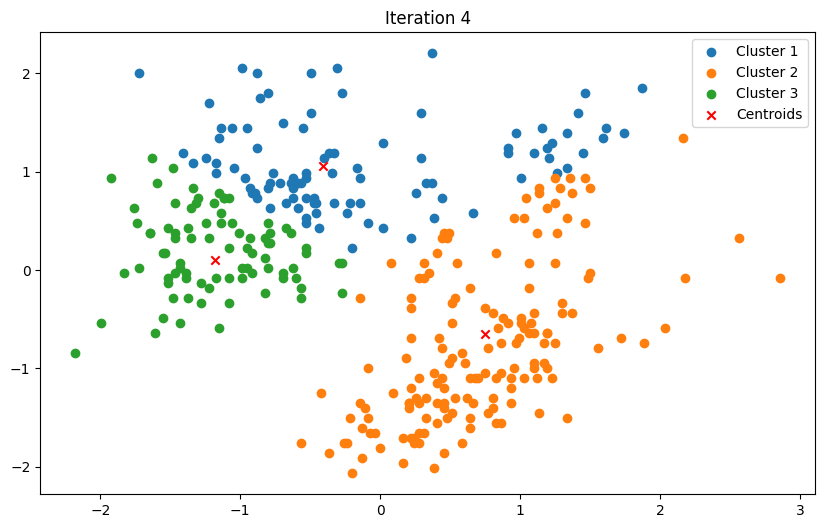

Iteration 4: Centroid shift = 0.2881
Cluster 0: Number of points = 99
Shape of cluster_points: (99, 2)
Shape of clusters array: (333,)
Cluster 1: Number of points = 138
Shape of cluster_points: (138, 2)
Shape of clusters array: (333,)
Cluster 2: Number of points = 96
Shape of cluster_points: (96, 2)
Shape of clusters array: (333,)
Iteration 5:
  Inertia: 253.1117
  Accuracy: 0.7958


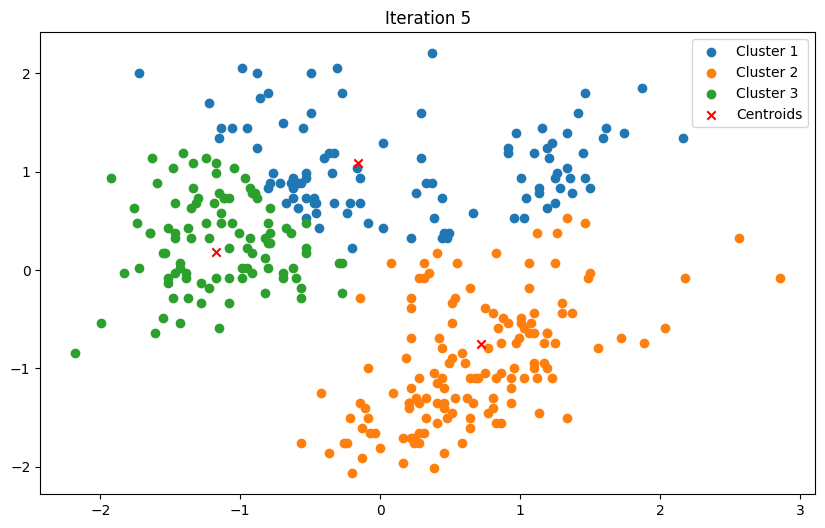

Iteration 5: Centroid shift = 0.4112
Cluster 0: Number of points = 87
Shape of cluster_points: (87, 2)
Shape of clusters array: (333,)
Cluster 1: Number of points = 130
Shape of cluster_points: (130, 2)
Shape of clusters array: (333,)
Cluster 2: Number of points = 116
Shape of cluster_points: (116, 2)
Shape of clusters array: (333,)
Iteration 6:
  Inertia: 241.9318
  Accuracy: 0.8468


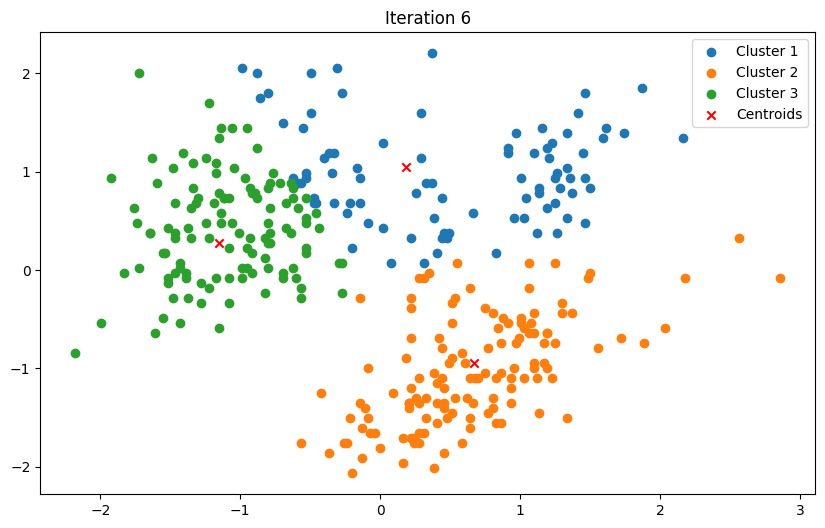

Iteration 6: Centroid shift = 0.3374
Cluster 0: Number of points = 77
Shape of cluster_points: (77, 2)
Shape of clusters array: (333,)
Cluster 1: Number of points = 125
Shape of cluster_points: (125, 2)
Shape of clusters array: (333,)
Cluster 2: Number of points = 131
Shape of cluster_points: (131, 2)
Shape of clusters array: (333,)
Iteration 7:
  Inertia: 232.2295
  Accuracy: 0.9009


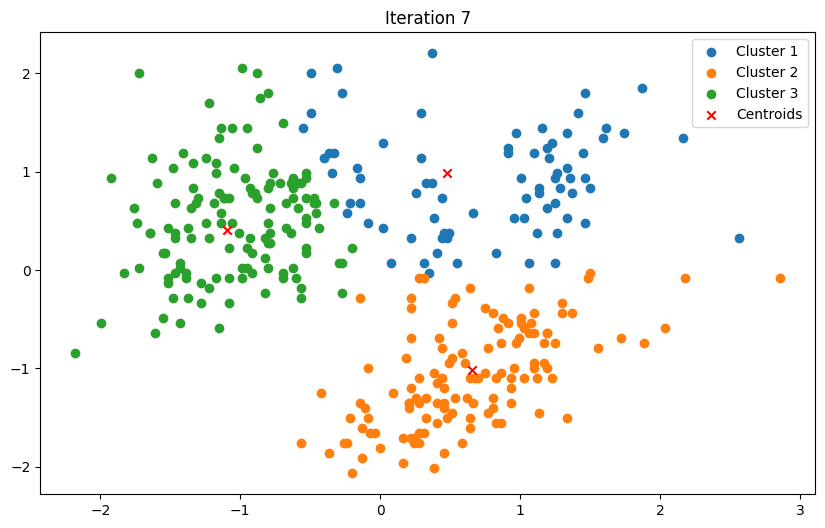

Iteration 7: Centroid shift = 0.2890
Cluster 0: Number of points = 72
Shape of cluster_points: (72, 2)
Shape of clusters array: (333,)
Cluster 1: Number of points = 121
Shape of cluster_points: (121, 2)
Shape of clusters array: (333,)
Cluster 2: Number of points = 140
Shape of cluster_points: (140, 2)
Shape of clusters array: (333,)
Iteration 8:
  Inertia: 225.1541
  Accuracy: 0.9159


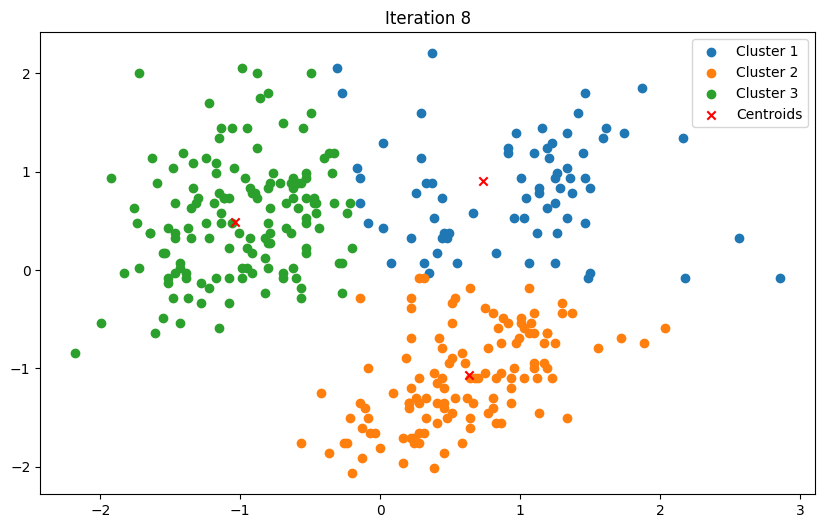

Iteration 8: Centroid shift = 0.2438
Cluster 0: Number of points = 67
Shape of cluster_points: (67, 2)
Shape of clusters array: (333,)
Cluster 1: Number of points = 120
Shape of cluster_points: (120, 2)
Shape of clusters array: (333,)
Cluster 2: Number of points = 146
Shape of cluster_points: (146, 2)
Shape of clusters array: (333,)
Iteration 9:
  Inertia: 220.5650
  Accuracy: 0.9249


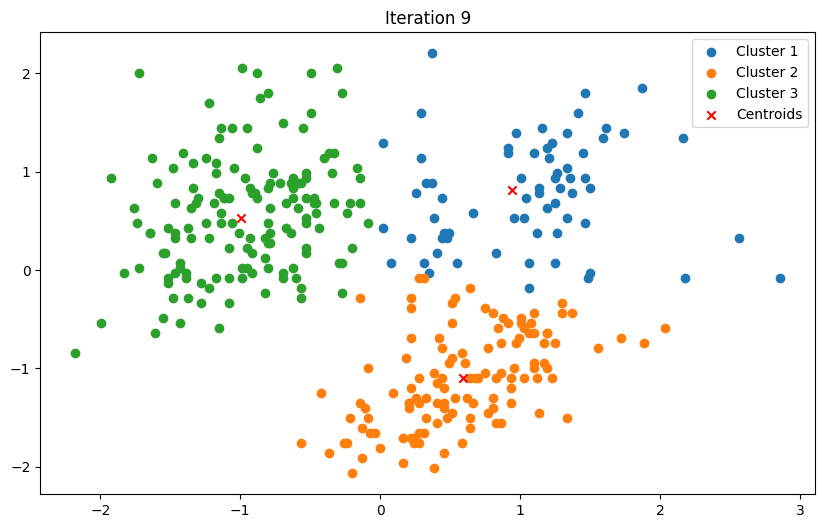

Iteration 9: Centroid shift = 0.1209
Cluster 0: Number of points = 65
Shape of cluster_points: (65, 2)
Shape of clusters array: (333,)
Cluster 1: Number of points = 120
Shape of cluster_points: (120, 2)
Shape of clusters array: (333,)
Cluster 2: Number of points = 148
Shape of cluster_points: (148, 2)
Shape of clusters array: (333,)
Iteration 10:
  Inertia: 219.2699
  Accuracy: 0.9279


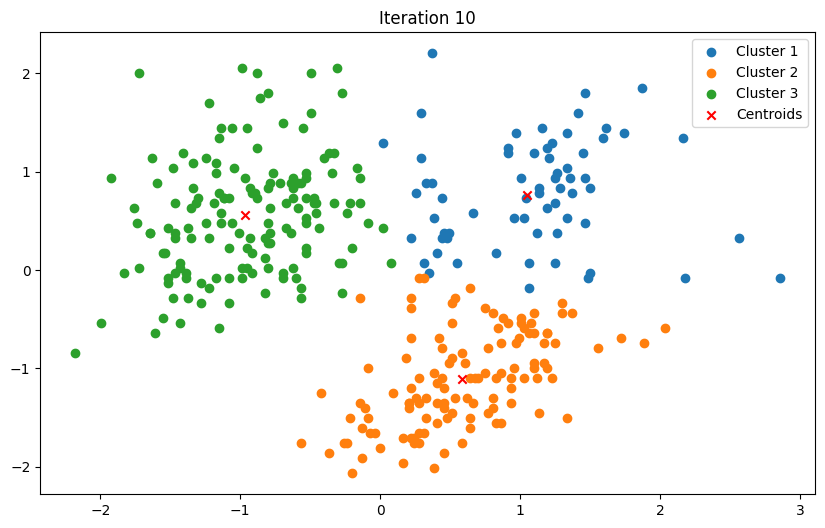

Iteration 10: Centroid shift = 0.0375
Cluster 0: Number of points = 65
Shape of cluster_points: (65, 2)
Shape of clusters array: (333,)
Cluster 1: Number of points = 120
Shape of cluster_points: (120, 2)
Shape of clusters array: (333,)
Cluster 2: Number of points = 148
Shape of cluster_points: (148, 2)
Shape of clusters array: (333,)
Iteration 11:
  Inertia: 219.0211
  Accuracy: 0.9279


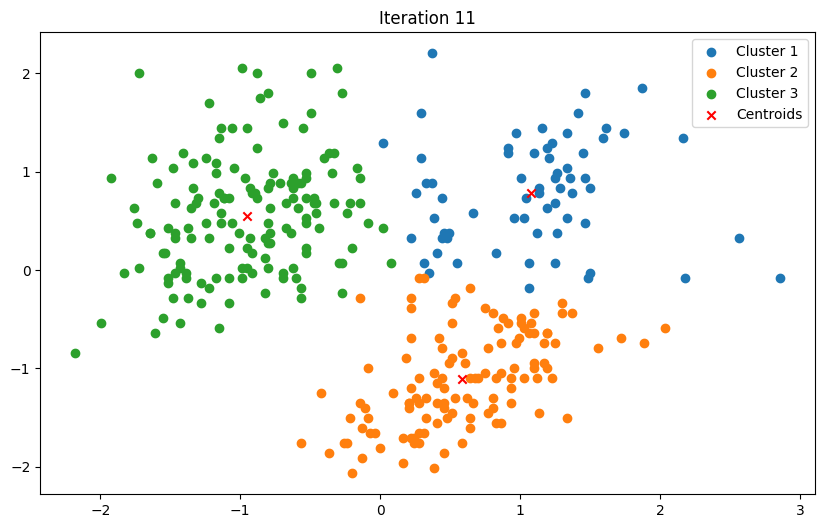

Iteration 11: Centroid shift = 0.0000
Convergence reached.


In [ ]:
#K-means on Penguins dataset
k = 3  # Number of clusters
kmeans_centroids_penguins, kmeans_clusters_penguins, kmeans_inertia_penguins = k_means(
    X_penguins, k=k, max_iterations=100, tolerance=1e-4, init_method="kmeans++", true_labels=y_penguins)

Cluster 0: Number of points = 45
Shape of cluster_points: (45, 2)
Shape of clusters array: (150,)
Cluster 1: Number of points = 65
Shape of cluster_points: (65, 2)
Shape of clusters array: (150,)
Cluster 2: Number of points = 40
Shape of cluster_points: (40, 2)
Shape of clusters array: (150,)
Iteration 0:
  Inertia: 117.3864
  Accuracy: 0.7267


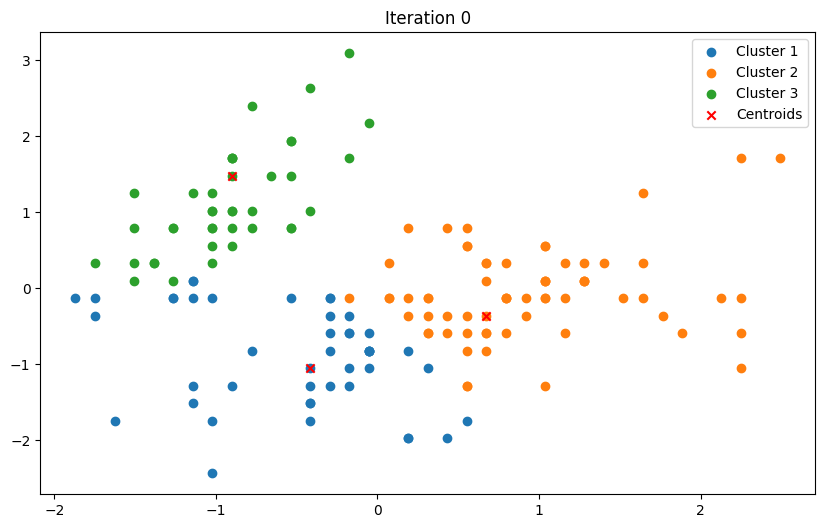

Iteration 0: Centroid shift = 0.5507
Cluster 0: Number of points = 46
Shape of cluster_points: (46, 2)
Shape of clusters array: (150,)
Cluster 1: Number of points = 62
Shape of cluster_points: (62, 2)
Shape of clusters array: (150,)
Cluster 2: Number of points = 42
Shape of cluster_points: (42, 2)
Shape of clusters array: (150,)
Iteration 1:
  Inertia: 109.4198
  Accuracy: 0.7467


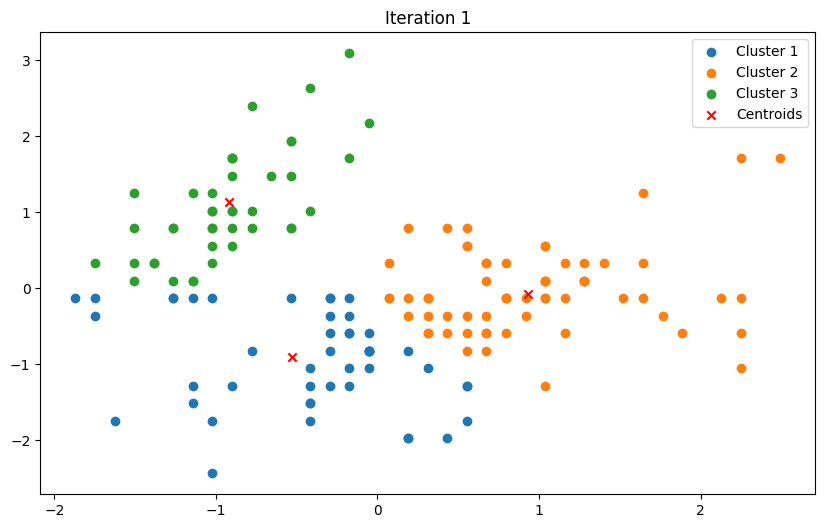

Iteration 1: Centroid shift = 0.1164
Cluster 0: Number of points = 46
Shape of cluster_points: (46, 2)
Shape of clusters array: (150,)
Cluster 1: Number of points = 60
Shape of cluster_points: (60, 2)
Shape of clusters array: (150,)
Cluster 2: Number of points = 44
Shape of cluster_points: (44, 2)
Shape of clusters array: (150,)
Iteration 2:
  Inertia: 108.2042
  Accuracy: 0.7733


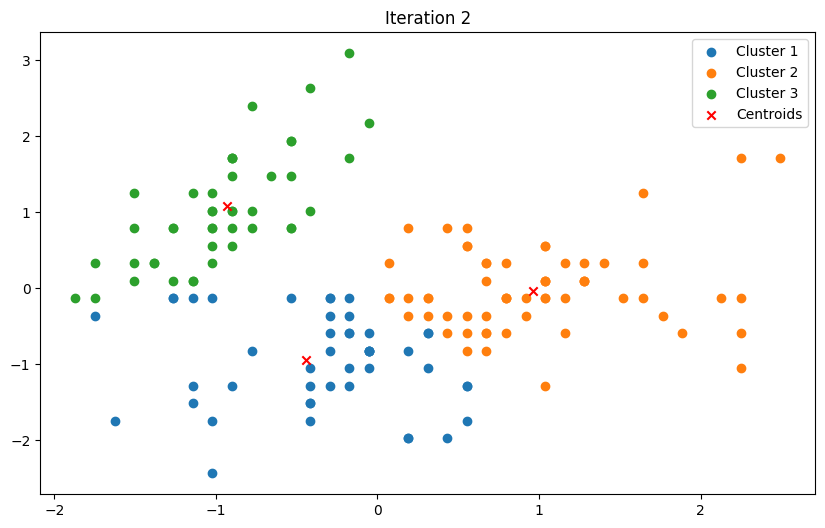

Iteration 2: Centroid shift = 0.1199
Cluster 0: Number of points = 45
Shape of cluster_points: (45, 2)
Shape of clusters array: (150,)
Cluster 1: Number of points = 59
Shape of cluster_points: (59, 2)
Shape of clusters array: (150,)
Cluster 2: Number of points = 46
Shape of cluster_points: (46, 2)
Shape of clusters array: (150,)
Iteration 3:
  Inertia: 106.9724
  Accuracy: 0.7933


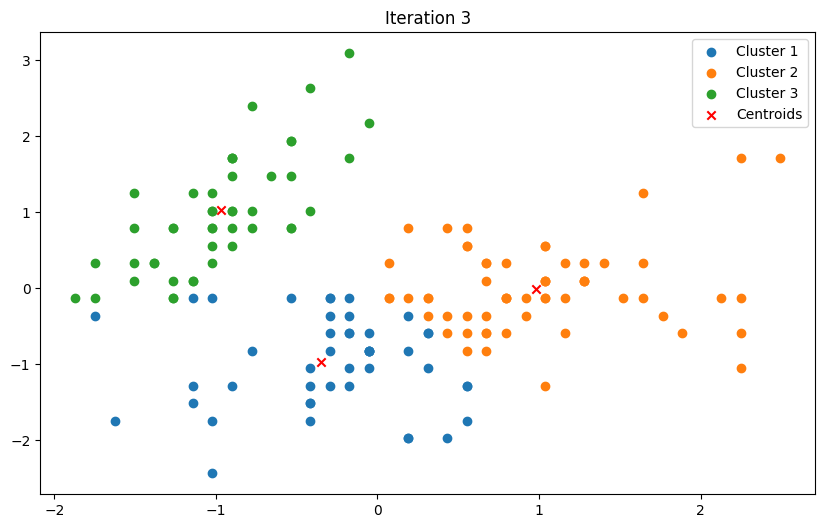

Iteration 3: Centroid shift = 0.0791
Cluster 0: Number of points = 43
Shape of cluster_points: (43, 2)
Shape of clusters array: (150,)
Cluster 1: Number of points = 58
Shape of cluster_points: (58, 2)
Shape of clusters array: (150,)
Cluster 2: Number of points = 49
Shape of cluster_points: (49, 2)
Shape of clusters array: (150,)
Iteration 4:
  Inertia: 106.2963
  Accuracy: 0.8067


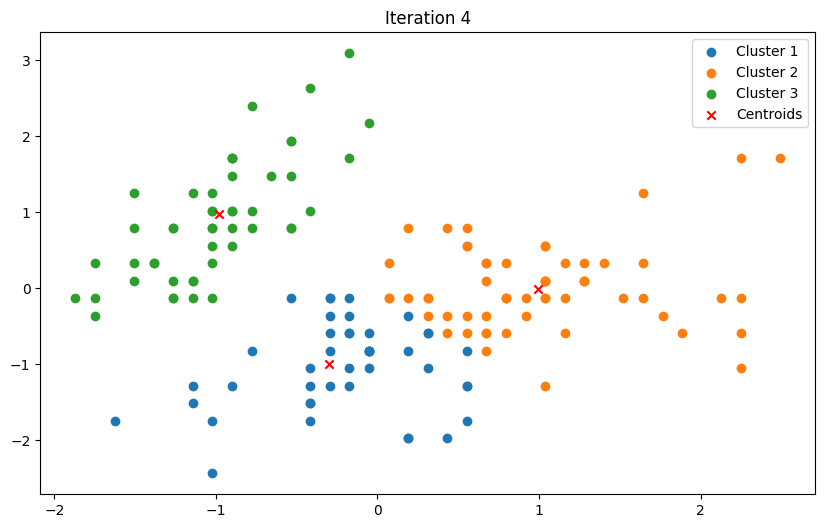

Iteration 4: Centroid shift = 0.1288
Cluster 0: Number of points = 45
Shape of cluster_points: (45, 2)
Shape of clusters array: (150,)
Cluster 1: Number of points = 56
Shape of cluster_points: (56, 2)
Shape of clusters array: (150,)
Cluster 2: Number of points = 49
Shape of cluster_points: (49, 2)
Shape of clusters array: (150,)
Iteration 5:
  Inertia: 105.5907
  Accuracy: 0.7933


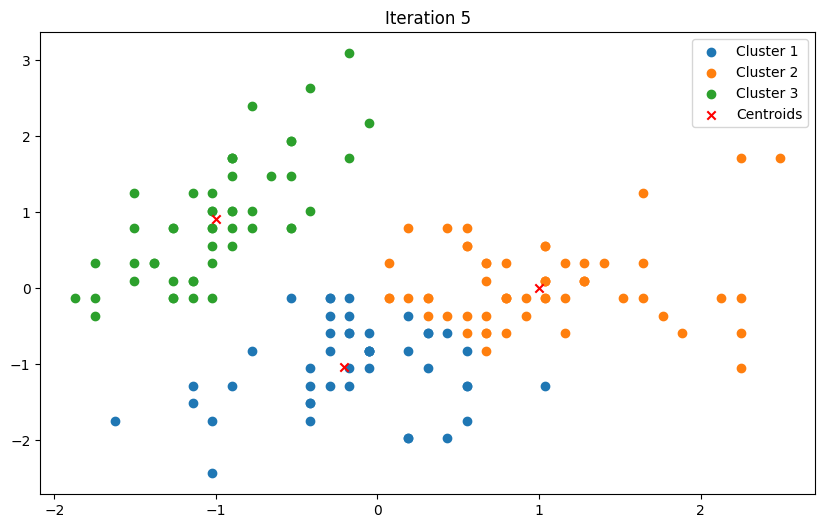

Iteration 5: Centroid shift = 0.0549
Cluster 0: Number of points = 48
Shape of cluster_points: (48, 2)
Shape of clusters array: (150,)
Cluster 1: Number of points = 53
Shape of cluster_points: (53, 2)
Shape of clusters array: (150,)
Cluster 2: Number of points = 49
Shape of cluster_points: (49, 2)
Shape of clusters array: (150,)
Iteration 6:
  Inertia: 105.3490
  Accuracy: 0.7867


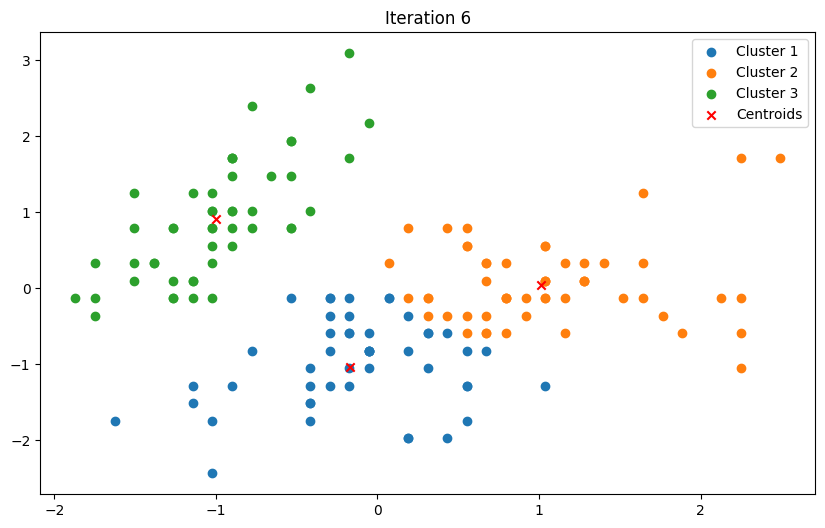

Iteration 6: Centroid shift = 0.0694
Cluster 0: Number of points = 50
Shape of cluster_points: (50, 2)
Shape of clusters array: (150,)
Cluster 1: Number of points = 51
Shape of cluster_points: (51, 2)
Shape of clusters array: (150,)
Cluster 2: Number of points = 49
Shape of cluster_points: (49, 2)
Shape of clusters array: (150,)
Iteration 7:
  Inertia: 105.0490
  Accuracy: 0.7867


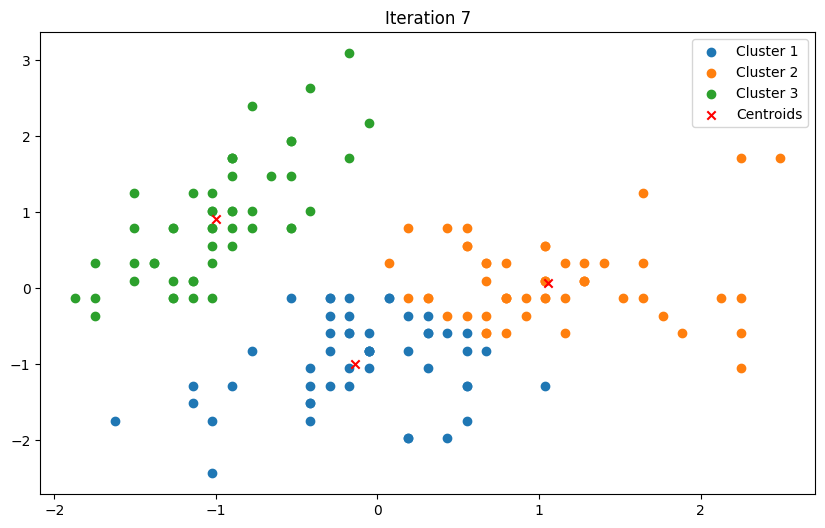

Iteration 7: Centroid shift = 0.0447
Cluster 0: Number of points = 51
Shape of cluster_points: (51, 2)
Shape of clusters array: (150,)
Cluster 1: Number of points = 50
Shape of cluster_points: (50, 2)
Shape of clusters array: (150,)
Cluster 2: Number of points = 49
Shape of cluster_points: (49, 2)
Shape of clusters array: (150,)
Iteration 8:
  Inertia: 104.9817
  Accuracy: 0.7800


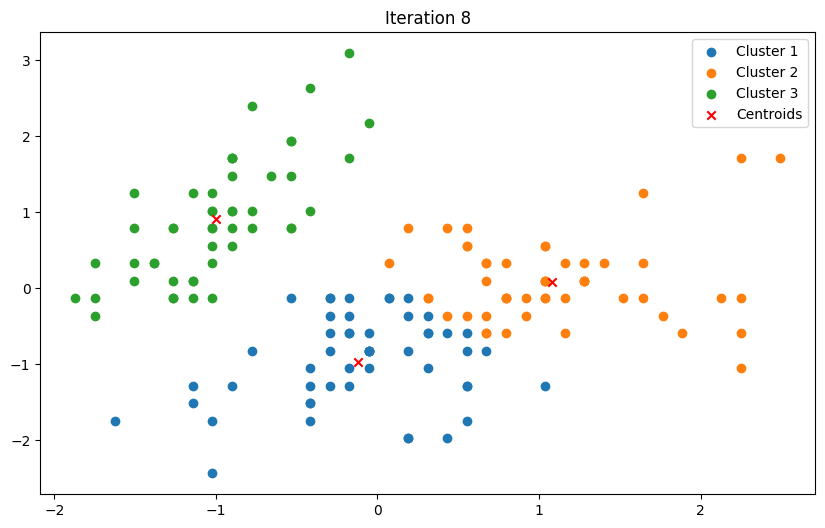

Iteration 8: Centroid shift = 0.0254
Cluster 0: Number of points = 51
Shape of cluster_points: (51, 2)
Shape of clusters array: (150,)
Cluster 1: Number of points = 50
Shape of cluster_points: (50, 2)
Shape of clusters array: (150,)
Cluster 2: Number of points = 49
Shape of cluster_points: (49, 2)
Shape of clusters array: (150,)
Iteration 9:
  Inertia: 104.9702
  Accuracy: 0.7800


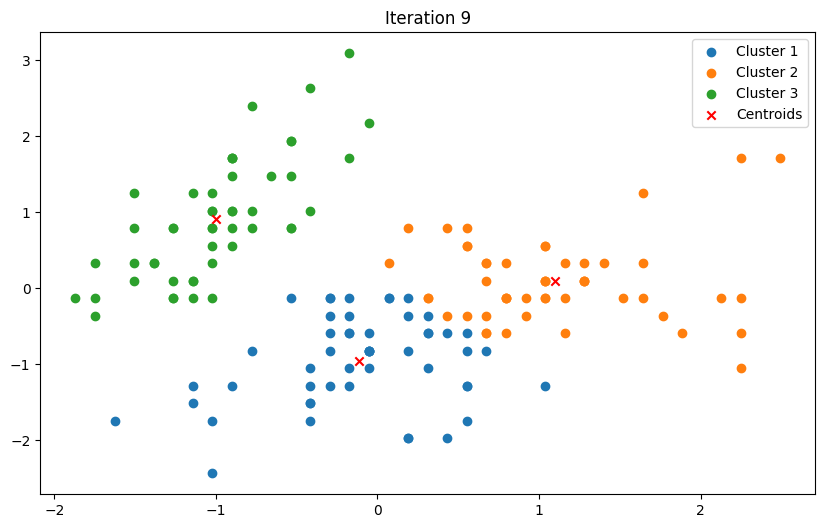

Iteration 9: Centroid shift = 0.0000
Convergence reached.


In [ ]:
#K-means on Iris dataset:
k = 3  # Number of clusters
kmeans_centroids_iris, kmeans_clusters_iris, kmeans_inertia_iris = k_means(
    X_iris, k=k, max_iterations=100, tolerance=1e-4, init_method="kmeans++", true_labels=y_iris)

##Great, now lets create our plots with the GMM means and the k-means centroids

In [ ]:
#Plotting function:
def plot_with_gmm_kmeans(clusterer, X, kmeans_centroids, title):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], 1000),
        np.linspace(mins[1], maxs[1], 1000)
    )
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(
        xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12)
    )
    plt.contour(
        xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors="k"
    )
    plt.scatter(X[:, 0], X[:, 1], c='gray', s=10, label="Data Points")

    # GMM means
    plt.scatter(clusterer.means_[:, 0], clusterer.means_[:, 1], c='blue', s=100, marker='o', label="GMM Means")

    # K-Means centroids
    plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', s=100, marker='x', label="K-Means Centroids")

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend()
    plt.title(title)
    plt.show()

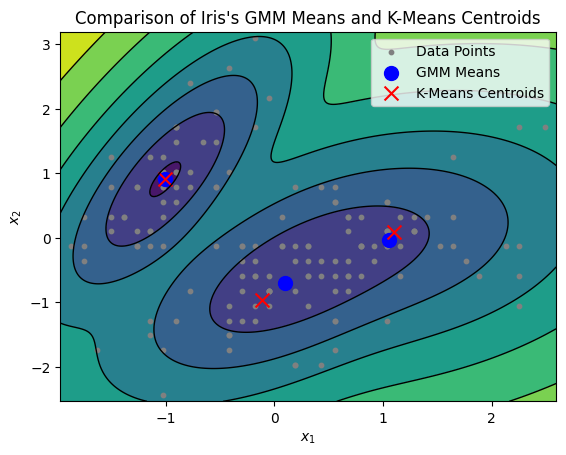

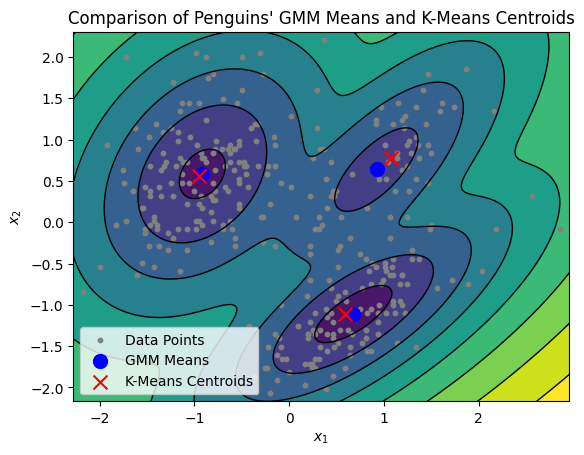

In [ ]:
#Plot:
plot_with_gmm_kmeans(gmm_iris, X_iris, kmeans_centroids_iris, "Comparison of Iris's GMM Means and K-Means Centroids")
plot_with_gmm_kmeans(gmm_penguins, X_penguins, kmeans_centroids_penguins, "Comparison of Penguins' GMM Means and K-Means Centroids")

In [ ]:
from sklearn.metrics import accuracy_score
#Function for calculating accuracy:
def calculate_model_accuracy(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    label_mapping = np.argmax(cm, axis=0)
    mapped_predictions = np.array([label_mapping[label] for label in predicted_labels])
    accuracy = accuracy_score(true_labels, mapped_predictions)
    return accuracy

In [ ]:
#Accuracy Outputs
#GMM Accuracy for Penguins:
gmm_penguin_prediction = gmm_penguins.predict(X_penguins)
gmm_penguin_accuracy = calculate_model_accuracy(y_penguins, gmm_penguin_prediction)
print(f"GMM Penguin Accuracy: {gmm_penguin_accuracy:.4f}")
#K-means accuracy for Penguins:
kmeans_penguins_accuracy = calculate_model_accuracy(y_penguins, kmeans_clusters_penguins)
print(f"Penguins K-Means Overall Accuracy: {kmeans_penguins_accuracy:.4f}")
#GMM Accuracy for Iris:
gmm_iris_predictions = gmm_iris.predict(X_iris)
gmm_iris_accuracy = calculate_model_accuracy(y_iris, gmm_iris_predictions)
print(f"GMM Iris Accuracy: {gmm_iris_accuracy:.4f}")
#K-means Accuracy for Iris:
kmeans_accuracy_iris = calculate_model_accuracy(y_iris, kmeans_clusters_iris)
print(f"K-Means Iris Accuracy: {kmeans_accuracy_iris:.4f}")

GMM Penguin Accuracy: 0.9640
Penguins K-Means Overall Accuracy: 0.9279
GMM Iris Accuracy: 0.7667
K-Means Iris Accuracy: 0.7800


## Have a great day!